In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
import scipy.stats as stats
import warnings # For handling error messages.
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
movie_data = pd.read_csv('data/movie_data_combined.csv')
movie_data = movie_data.loc[movie_data.runtime > 60]

In [3]:
movie_data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'year',
       'month', 'genre_ids', 'original_language', 'popularity', 'budget',
       'revenue', 'runtime', 'cast', 'director_id'],
      dtype='object')

In [4]:
movie_data.drop(columns=['cast', 'release_date', 'vote_count', 'original_language', 'popularity'], inplace=True)

In [5]:
movie_data.genre_ids.unique()

array(['[27, 53, 9648]', '[36, 10752, 18, 12]', '[37, 28, 12]', ...,
       '[10749, 28, 35]', '[28, 14, 10770]', '[35, 14, 10751, 12, 27]'],
      dtype=object)

In [6]:
len(list(movie_data.director_id.unique()))

2599

In [7]:
movie_data.dtypes

id                int64
title            object
vote_average    float64
year              int64
month             int64
genre_ids        object
budget          float64
revenue         float64
runtime           int64
director_id       int64
dtype: object

In [8]:
# Find number of unique directors
print(f"Number of unique numbers in the 'director_id' column: {movie_data['director_id'].nunique()}")

Number of unique numbers in the 'director_id' column: 2599


In [9]:
# Convert string representations of lists to actual lists of integers
movie_data['genre_ids'] = movie_data['genre_ids'].apply(lambda x: ast.literal_eval(x))

# Flatten the list of lists into a single list
flattened_list = [number for sublist in movie_data['genre_ids'] for number in sublist]

# Convert the flattened list into a set to find unique numbers
unique_genres = set(flattened_list)

# Count the number of unique elements
unique_count = len(unique_genres)

print(f"Number of unique numbers in the 'genre' column: {unique_count}")

Number of unique numbers in the 'genre' column: 19


In [10]:
unique_genres

{12,
 14,
 16,
 18,
 27,
 28,
 35,
 36,
 37,
 53,
 80,
 99,
 878,
 9648,
 10402,
 10749,
 10751,
 10752,
 10770}

In [11]:
movie_data.groupby('year').size()

year
1960     12
1961      9
1962     17
1963     14
1964     11
       ... 
2020    194
2021    201
2022    174
2023    127
2024      4
Length: 65, dtype: int64

In [12]:
null_values = movie_data.groupby('year').agg(lambda x: x.isna().sum())
null_values_series = null_values[['budget', 'revenue']].T
null_values_series

year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
budget,6,3,7,4,2,0,4,5,4,2,...,62,63,90,115,84,114,92,66,36,2
revenue,3,2,8,4,3,3,3,5,4,2,...,38,48,74,88,80,95,80,68,38,2


In [13]:
null_values_series.loc['budget']

year
1960      6
1961      3
1962      7
1963      4
1964      2
       ... 
2020    114
2021     92
2022     66
2023     36
2024      2
Name: budget, Length: 65, dtype: int64

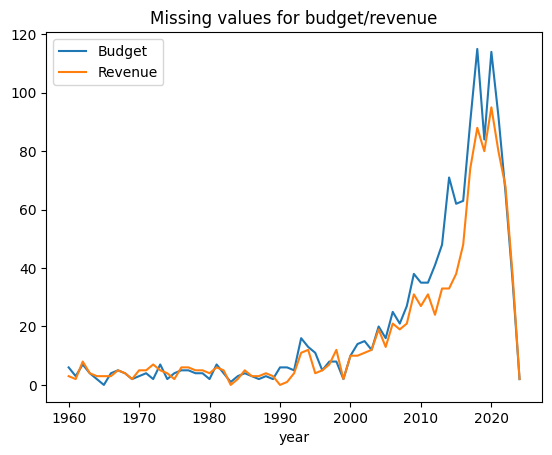

In [14]:
null_values_series.loc['budget'].plot(x='year',
                        y='budget',
                        kind='line')

null_values_series.loc['revenue'].plot(x='year',
                        y='revenue',
                        kind='line',
                        title='Missing values for budget/revenue')

plt.legend(['Budget', 'Revenue'])
plt.show()

In [15]:
kaggle_movies = pd.read_csv('data/kaggle_movies.csv')

In [16]:
kaggle_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [17]:
movie_data.dtypes

id                int64
title            object
vote_average    float64
year              int64
month             int64
genre_ids        object
budget          float64
revenue         float64
runtime           int64
director_id       int64
dtype: object

In [18]:
kaggle_movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
kaggle_movies = kaggle_movies.rename(columns={'name': 'title', 'budget': 'kag_budget', 'gross': 'kag_revenue'})

In [20]:
kaggle_merge = kaggle_movies[['title','year','kag_budget','kag_revenue']]
kaggle_merge

,title,year,kag_budget,kag_revenue
0,The Shining,1980,19000000.0,46998772.0
1,The Blue Lagoon,1980,4500000.0,58853106.0
2,Star Wars: Episode V - The Empire Strikes Back,1980,18000000.0,538375067.0
3,Airplane!,1980,3500000.0,83453539.0
4,Caddyshack,1980,6000000.0,39846344.0
...,...,...,...,...
7663,More to Life,2020,7000.0,NaN
7664,Dream Round,2020,NaN,NaN
7665,Saving Mbango,2020,58750.0,NaN
7666,It's Just Us,2020,15000.0,NaN


In [21]:
movie_data = movie_data.merge(kaggle_merge, how='left', on=['title', 'year'])

In [22]:
movie_data

,id,title,vote_average,year,month,genre_ids,budget,revenue,runtime,director_id,kag_budget,kag_revenue
0,539,Psycho,8.434,1960,6,"[27, 53, 9648]",806947.0,32000000.0,109,2636,NaN,NaN
1,967,Spartacus,7.500,1960,10,"[36, 10752, 18, 12]",12000000.0,60000000.0,197,240,NaN,NaN
2,966,The Magnificent Seven,7.500,1960,10,"[37, 28, 12]",2000000.0,4905000.0,127,14520,NaN,NaN
3,284,The Apartment,8.214,1960,6,"[35, 18, 10749]",3000000.0,25000000.0,125,3146,NaN,NaN
4,439,La Dolce Vita,8.121,1960,2,"[35, 18]",NaN,19647000.0,176,4415,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6416,1026227,There's Still Tomorrow,8.295,2023,10,"[35, 18]",9000000.0,38825277.0,118,133214,NaN,NaN
6417,693134,Dune: Part Two,8.549,2024,2,"[28, 12, 878]",190000000.0,178000000.0,166,137427,NaN,NaN
6418,933131,Badland Hunters,6.800,2024,1,"[878, 28, 18]",NaN,NaN,107,2879867,NaN,NaN
6419,866398,The Beekeeper,7.400,2024,1,"[28, 53, 18]",35000000.0,149645000.0,105,19769,NaN,NaN


In [23]:
movie_data.isna().sum()

id                 0
title              0
vote_average       0
year               0
month              0
genre_ids          0
budget          1340
revenue         1106
runtime            0
director_id        0
kag_budget      2940
kag_revenue     2505
dtype: int64

In [24]:
movie_data.loc[movie_data['budget'].isna() & ~movie_data['kag_budget'].isna(), 'budget'] = movie_data.loc[movie_data['budget'].isna() & ~movie_data['kag_budget'].isna(), 'kag_budget']
movie_data.loc[movie_data['revenue'].isna() & ~movie_data['kag_revenue'].isna(), 'revenue'] = movie_data.loc[movie_data['revenue'].isna() & ~movie_data['kag_revenue'].isna(), 'kag_revenue']

In [25]:
movie_data.drop(columns=['kag_budget', 'kag_revenue'], inplace=True)

In [26]:
movie_data.isna().sum()

id                 0
title              0
vote_average       0
year               0
month              0
genre_ids          0
budget          1283
revenue         1002
runtime            0
director_id        0
dtype: int64

Filled in a few missing values, but not many.

In [27]:
movie_data

,id,title,vote_average,year,month,genre_ids,budget,revenue,runtime,director_id
0,539,Psycho,8.434,1960,6,"[27, 53, 9648]",806947.0,32000000.0,109,2636
1,967,Spartacus,7.500,1960,10,"[36, 10752, 18, 12]",12000000.0,60000000.0,197,240
2,966,The Magnificent Seven,7.500,1960,10,"[37, 28, 12]",2000000.0,4905000.0,127,14520
3,284,The Apartment,8.214,1960,6,"[35, 18, 10749]",3000000.0,25000000.0,125,3146
4,439,La Dolce Vita,8.121,1960,2,"[35, 18]",NaN,19647000.0,176,4415
...,...,...,...,...,...,...,...,...,...,...
6416,1026227,There's Still Tomorrow,8.295,2023,10,"[35, 18]",9000000.0,38825277.0,118,133214
6417,693134,Dune: Part Two,8.549,2024,2,"[28, 12, 878]",190000000.0,178000000.0,166,137427
6418,933131,Badland Hunters,6.800,2024,1,"[878, 28, 18]",NaN,NaN,107,2879867
6419,866398,The Beekeeper,7.400,2024,1,"[28, 53, 18]",35000000.0,149645000.0,105,19769


In [28]:
movie_data['year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [29]:
years = movie_data['year'].unique()

for year in years:
    # Filter data for the current year
    curr_year = movie_data[movie_data['year'] == year]
    
    # Calculate medians for budget and revenue
    budget_median = curr_year['budget'].median()
    revenue_median = curr_year['revenue'].median()
    
    # Fill missing values for budget and revenue with the medians
    movie_data.loc[movie_data['year'] == year, 'budget'] = movie_data.loc[movie_data['year'] == year, 'budget'].fillna(budget_median)
    movie_data.loc[movie_data['year'] == year, 'revenue'] = movie_data.loc[movie_data['year'] == year, 'revenue'].fillna(revenue_median)

In [30]:
movie_data

,id,title,vote_average,year,month,genre_ids,budget,revenue,runtime,director_id
0,539,Psycho,8.434,1960,6,"[27, 53, 9648]",806947.0,32000000.0,109,2636
1,967,Spartacus,7.500,1960,10,"[36, 10752, 18, 12]",12000000.0,60000000.0,197,240
2,966,The Magnificent Seven,7.500,1960,10,"[37, 28, 12]",2000000.0,4905000.0,127,14520
3,284,The Apartment,8.214,1960,6,"[35, 18, 10749]",3000000.0,25000000.0,125,3146
4,439,La Dolce Vita,8.121,1960,2,"[35, 18]",1403473.5,19647000.0,176,4415
...,...,...,...,...,...,...,...,...,...,...
6416,1026227,There's Still Tomorrow,8.295,2023,10,"[35, 18]",9000000.0,38825277.0,118,133214
6417,693134,Dune: Part Two,8.549,2024,2,"[28, 12, 878]",190000000.0,178000000.0,166,137427
6418,933131,Badland Hunters,6.800,2024,1,"[878, 28, 18]",112500000.0,163822500.0,107,2879867
6419,866398,The Beekeeper,7.400,2024,1,"[28, 53, 18]",35000000.0,149645000.0,105,19769


In [31]:
movie_data.to_csv('data/cleaned_data.csv')

In [ ]:
genre_dict = {'Action':28, 'Adventure':12, 'Animation':16, 'Comedy':35, 'Crime':80, 'Documentary':99,
              'Drama':18, 'Family':10751, 'Fantasy':14, 'History':36, 'Horror':27, 'Music':10402,
              'Mystery':9648, 'Romance':10749, 'Science_Fiction':878, 'Thriller':53,
              'War':10752, 'Western':37}

In [ ]:
movie_data.genre_ids[0]

In [ ]:
id_to_genre = {v: k for k, v in genre_dict.items()}

# Add new columns for each genre, initializing with 0
for genre in genre_dict.keys():
    movie_data[genre] = 0

# Iterate through the dataframe and set genre columns
for index, row in movie_data.iterrows():
    for genre_id in row['genre_ids']:
        genre_name = id_to_genre.get(genre_id)
        if genre_name:
            movie_data.at[index, genre_name] = 1

In [ ]:
movie_data.shape

In [ ]:
average_rating = np.mean(movie_data.vote_average)

In [ ]:
_ = plt.hist(movie_data.vote_average, bins=20)
_ = plt.axvline(x=average_rating, color='r', linestyle='--')

In [ ]:
genre_col = {key: i + 10 for i, key in enumerate(genre_dict.keys())}
genre_col

In [ ]:
filtered_dfs = {}
for genre, col_index in genre_col.items():
    filtered_dfs[genre] = movie_data[movie_data.iloc[:, col_index] == 1]

In [ ]:
filtered_dfs['Action']

In [ ]:
for key in filtered_dfs.keys():
    print(key, filtered_dfs[key].vote_average.mean())

In [ ]:
movie_col = movie_data[['vote_average', 'year', 'month', 'budget',
       'revenue', 'runtime', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science_Fiction',
       'Thriller', 'War', 'Western']]
correlation = movie_col.corr()
correlation

In [ ]:
_ = sns.heatmap(correlation)

In [ ]:
correlation.vote_average.sort_values(ascending=False)

### Are dramas more popular?

In [ ]:
drama_rating = movie_data.loc[movie_data.Drama == 1].vote_average
not_drama_rating = movie_data.loc[movie_data.Drama != 1].vote_average

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [ ]:
# Compute ECDF for drama data: x_drama, y_drama
x_drama, y_drama = ecdf(drama_rating)
x_not_drama, y_not_drama = ecdf(not_drama_rating)

# Generate plot
_ = plt.plot(x_drama, y_drama, marker='.', linestyle='none')
_ = plt.plot(x_not_drama, y_not_drama, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('x value?')
_ = plt.ylabel('ECDF')
_ = plt.legend(['Drama','Not Drama'])
_ = plt.title('Empirical Cumulative Distribution Function: Drama films')

# Display the plot
plt.show()

#### Visually, it seems clear that dramatic films are rated more highly than other films.
We can also demonstrate this through null hypothesis significance testing.

Null hypothesis: There is no difference in ratings beween dramas and non-dramatic films.

In [ ]:
all_rating = np.concatenate((drama_rating, not_drama_rating))
mean_replicates = []

for i in range(10000):
    rand_rating = np.random.permutation(all_rating)
    rand_drama = rand_rating[:len(drama_rating)]
    # rand_not_drama = rand_rating[len(drama_rating):]
    mean_replicates.append(np.mean(rand_drama))

In [ ]:
np.mean(mean_replicates)

In [ ]:
drama_mean = np.mean(drama_rating)
drama_mean

In [ ]:
_ = sns.histplot(mean_replicates)
_ = plt.axvline(x=drama_mean, color='r', linestyle='--')

In [ ]:
mean_replicates_array = np.array(mean_replicates)
count_greater_than_drama_mean = np.sum(mean_replicates_array > drama_mean)

print(count_greater_than_drama_mean)

After taking 10000 permutations of the data, none of the replicates had average ratings anywhere close to the average rating of drama films. We have therefore shown visually and computationally that drama films are rated more highly than the average of all films in the dataset, with a very small p-value.

In [ ]:
# movie_data.to_csv('data/filtered_data.csv')